In [8]:
import lightkurve
from lightkurve import KeplerTargetPixelFile
import lightkurve.injection as inj
import matplotlib.pyplot as plt
import numpy as np
import ktransit

In [9]:
tpf = KeplerTargetPixelFile.from_archive(220381074)   #KeplerTargetPixelFile
lc = tpf.to_lightcurve(aperture_mask='all')           #KeplerLightCurve

#Remove nans and outliers
lc = lc.remove_nans().remove_outliers()

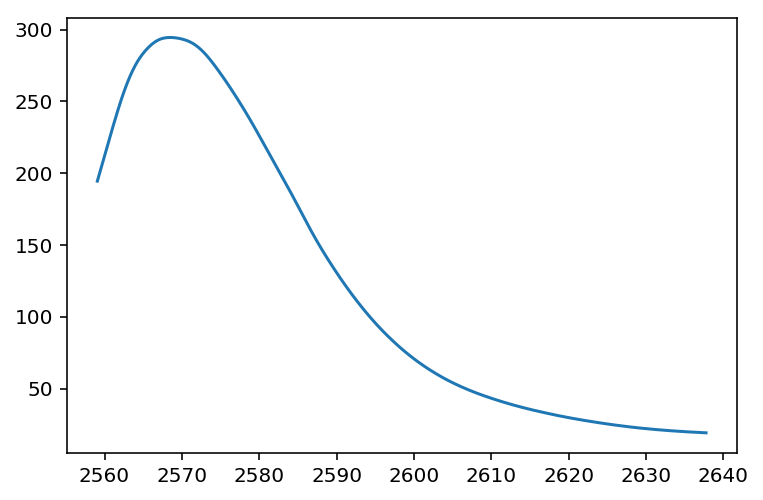

In [10]:
model = inj.SupernovaModel()
#t0=np.nanmedian(lc.time)
flux = model.evaluate(lc.time, t0=2570, amplitude=1e-4)

plt.plot(lc.time, flux)

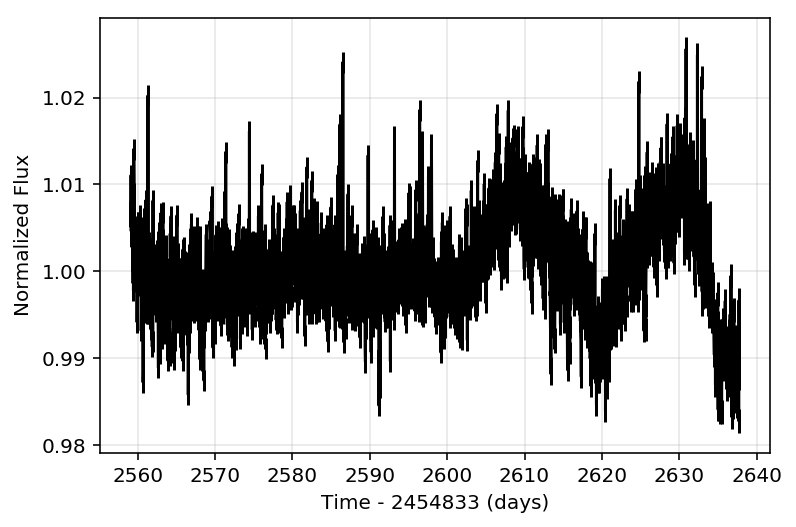

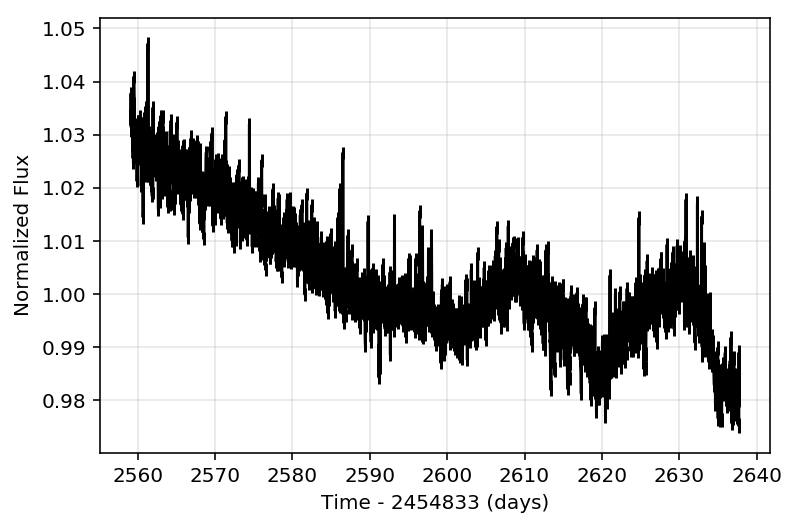

In [11]:
lcinj = inj.inject(lc, model, amplitude=1e-4)

lc.plot()

lcinj.plot()


In [12]:
model2 = inj.TransitModel(rprs=0.9)
print(model2.period)
print(model2.rprs)

[11.47334527]
0.9


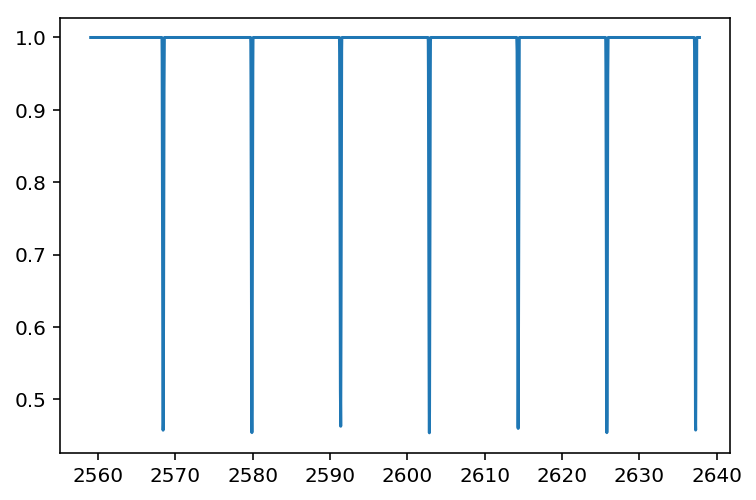

In [13]:
flux2 = model2.evaluate(lc.time)
plt.plot(lc.time, flux2)

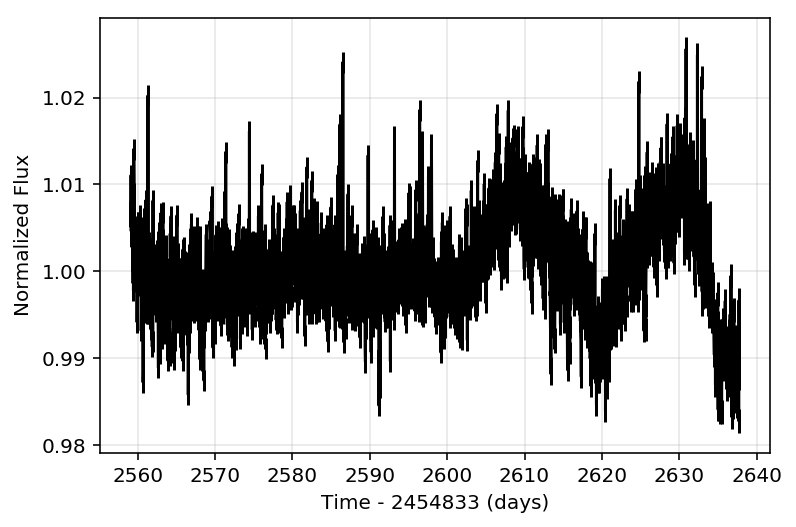

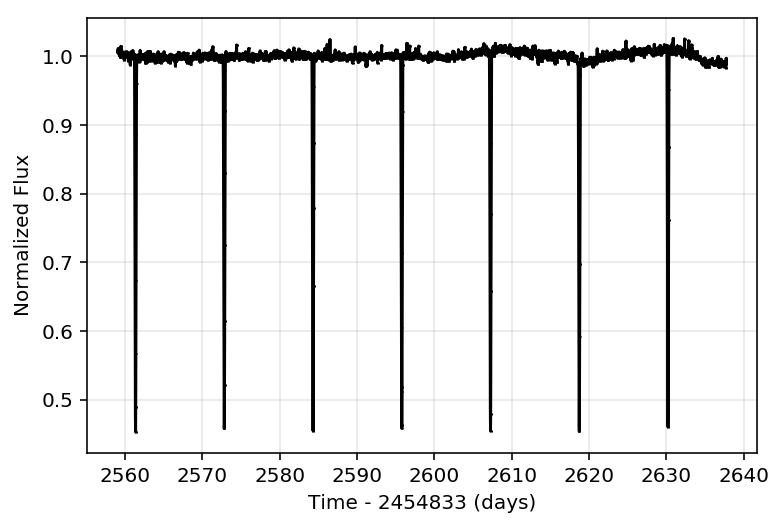

In [14]:
lcinj2 = inj.inject(lc, model2)

lc.plot()

lcinj2.plot()

In [ ]:
M = ktransit.LCModel()
M.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M.add_planet(
        T0=1.0,     # a transit mid-time  
        period=1.0, # an orbital period in days
        impact=0.1, # an impact parameter
        rprs=0.1,   # planet stellar radius ratio  
        ecosw=0.0,  # eccentricity vector
        esinw=0.0,
        occ=0.0)  